In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow_datasets as tfds
from tensorflow.data.experimental import sample_from_datasets

tfkl = tfk.layers

**Preprocessing**

As typical, we'll start with the MNIST data. Recall from last time, we have to do some transformations and preprocessing on these images.

In [2]:
data, info = tfds.load('mnist', with_info=True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
preprocess = lambda d: (tf.cast(d["image"], tf.float32)/255, tf.one_hot(d["label"], depth=10))

ds_train = data["train"].map(preprocess).cache().batch(32)
ds_test = data["test"].map(preprocess).cache().batch(32)

In [4]:
img_shape = info.features['image'].shape

In [5]:
img_shape

(28, 28, 1)

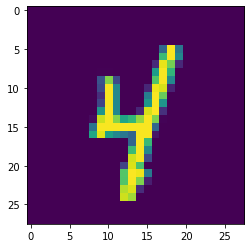

In [6]:
x, y = next(iter(ds_train))
plt.imshow(x[0,:,:,0])

**CNNs in TF Keras**

We'll use the Sequential class rely on new layer types that correspond to concepts we covered in lecture: Conv2D, AvgPool2D, MaxPool2D. 

Details such as kernel size, padding, strides and so on must be specified as args to these classes, where appropriate.

In [8]:
model = tfk.Sequential()
model.add(tfkl.Conv2D(filters = 1, kernel_size=(3,3), strides=(1,1), 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model.add(tfkl.MaxPool2D(pool_size=(4,4)))
model.add(tfkl.Flatten())
model.add(tfkl.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 1)         10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 1)           0         
_________________________________________________________________
flatten (Flatten)            (None, 36)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                370       
Total params: 380
Trainable params: 380
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = model.fit(ds_train, steps_per_epoch=20, epochs=20, validation_data=ds_test)

Epoch 1/20
20/20 [==============================] - 3s 140ms/step - loss: 2.2809 - val_loss: 2.2633
Epoch 2/20
20/20 [==============================] - 2s 78ms/step - loss: 2.2456 - val_loss: 2.2422
Epoch 3/20
20/20 [==============================] - 2s 76ms/step - loss: 2.2506 - val_loss: 2.2214
Epoch 4/20
20/20 [==============================] - 2s 76ms/step - loss: 2.2123 - val_loss: 2.1911
Epoch 5/20
20/20 [==============================] - 2s 76ms/step - loss: 2.1964 - val_loss: 2.1553
Epoch 6/20
20/20 [==============================] - 2s 77ms/step - loss: 2.1490 - val_loss: 2.1113
Epoch 7/20
20/20 [==============================] - 2s 77ms/step - loss: 2.1237 - val_loss: 2.0629
Epoch 8/20
20/20 [==============================] - 2s 76ms/step - loss: 2.0450 - val_loss: 2.0055
Epoch 9/20
20/20 [==============================] - 2s 76ms/step - loss: 1.9850 - val_loss: 1.9436
Epoch 10/20
20/20 [==============================] - 2s 78ms/step - loss: 1.9138 - val_loss: 1.8781
Epoch 11

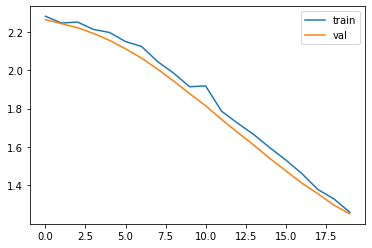

In [11]:
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "val"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Probability')

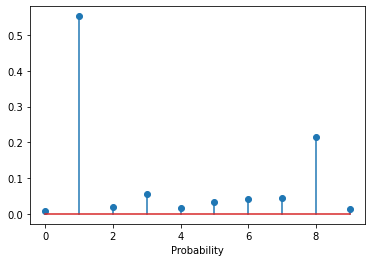

In [12]:
plt.stem(model.predict(ds_test.take(1))[9, :])
plt.xlabel("Digit")
plt.xlabel("Probability")

Which architectural hyperparameters might we change in the above?



**Exercise - Deep CNN**

Build and fit your own CNN model with 3 convolutional **modules**, where each one contains:
  * kernel convolution 
    * you pick number of kernels
    * you pick kernel shape/size
    * you pick activation
  * pooling
  * dropout

We'll use the Fashion MNIST dataset, a low-res collection of images of clothing.

In [13]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

images, labels = train
images = images/255.0
images = images[:, :, :, np.newaxis]
labels = tf.one_hot(labels.astype(np.int32),depth = 10)

# optional - TF Datasets objects
# fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
# fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)


4423680/4422102 [==============================] - 0s 0us/step


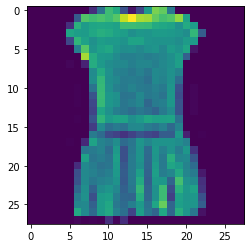

In [14]:
plt.imshow(images[3, :, :, :].squeeze())

In [15]:
# your code here
model = tfk.Sequential()
model.add(tfkl.Conv2D(filters = 32, kernel_size=2, strides=2, 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model.add(tfkl.MaxPool2D(pool_size=(2)))
model.add(tfkl.Dropout(.2))


model.add(tfkl.Conv2D(filters = 16, kernel_size=2, strides=1, 
                      padding="valid", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=(2)))
model.add(tfkl.Dropout(.2))


model.add(tfkl.Conv2D(filters = 8, kernel_size=2, strides=1, 
                      padding="valid", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=(2)))
model.add(tfkl.Dropout(.2))

model.add(tfkl.GlobalMaxPool2D())
model.add(tfkl.Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 32)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 16)          2064      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 8)          

In [18]:
model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = model.fit(images, labels,batch_size = 20, epochs=25)

Epoch 1/25
3000/3000 [==============================] - 15s 5ms/step - loss: 0.9489
Epoch 2/25
3000/3000 [==============================] - 16s 5ms/step - loss: 0.9191
Epoch 3/25
3000/3000 [==============================] - 16s 5ms/step - loss: 0.8994
Epoch 4/25
3000/3000 [==============================] - 15s 5ms/step - loss: 0.8847
Epoch 5/25
3000/3000 [==============================] - 15s 5ms/step - loss: 0.8756
Epoch 6/25
3000/3000 [==============================] - 16s 5ms/step - loss: 0.8695
Epoch 7/25
3000/3000 [==============================] - 15s 5ms/step - loss: 0.8615
Epoch 8/25
3000/3000 [==============================] - 16s 5ms/step - loss: 0.8627
Epoch 9/25
3000/3000 [==============================] - 15s 5ms/step - loss: 0.8607
Epoch 10/25
3000/3000 [==============================] - 15s 5ms/step - loss: 0.8525
Epoch 11/25
3000/3000 [==============================] - 15s 5ms/step - loss: 0.8500
Epoch 12/25
3000/3000 [==============================] - 15s 5ms/step - lo

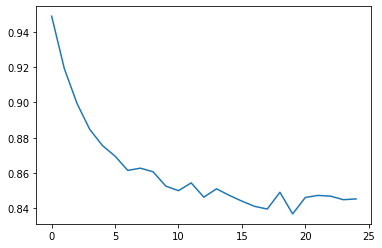

In [20]:
plt.plot(results.history["loss"])


#|**Exercise - Transfer Learning**



In [21]:
data, info = tfds.load('rock_paper_scissors', with_info=True)
train_data = data["train"].map(lambda x: (tf.cast(x["image"], tf.float32) / 255., tf.one_hot(x["label"], depth=3) )).batch(32)

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteDOPNUN/rock_paper_scissors-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteDOPNUN/rock_paper_scissors-test.tfrecord


Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [28]:
test_data = data["test"].map(lambda x: (tf.cast(x["image"], tf.float32) / 255., tf.one_hot(x["label"], depth=3) )).batch(32)

In [22]:
info.features['image'].shape

(300, 300, 3)

,image,label
0,,2 (scissors)
1,,2 (scissors)
2,,0 (rock)
3,,1 (paper)
4,,0 (rock)
5,,1 (paper)
6,,2 (scissors)
7,,1 (paper)
8,,2 (scissors)
9,,2 (scissors)

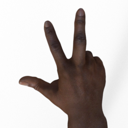
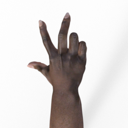
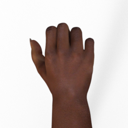
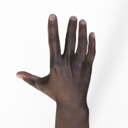
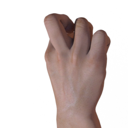
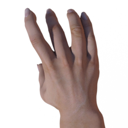
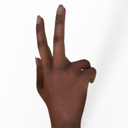
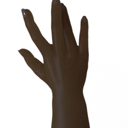
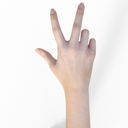
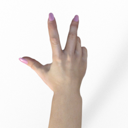

In [23]:
tfds.as_dataframe(data["train"].take(10), info)

# Exercise

1. Build a deep CNN model and train it for this binary classification task. Fit the model using the small dataset of 500 samples, *train_data*.

What accuracy can your model acheive on the training data?

In [24]:
model = tfk.Sequential()
model.add(tfkl.Conv2D(filters = 64, kernel_size=5, strides=5, 
                      padding="valid", activation='relu', input_shape=(300, 300, 3)))
model.add(tfkl.MaxPool2D(pool_size = 5))
model.add(tfkl.Dropout(0.2))

model.add(tfkl.Conv2D(filters = 32, kernel_size=2, strides=1, 
                      padding="valid", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size = 2))
model.add(tfkl.Dropout(0.2))

model.add(tfkl.Conv2D(filters = 16, kernel_size=2, strides=1, 
                      padding="valid", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size = 2))
model.add(tfkl.Dropout(0.2))

model.add(tfkl.GlobalMaxPool2D())
model.add(tfkl.Dense(3, activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 60, 60, 64)        4864      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        8224      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 16)         

In [29]:
model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
    metrics=[tfk.metrics.CategoricalAccuracy()]
)

results = model.fit(train_data, batch_size=32, epochs=10, validation_data = test_data)

Epoch 1/10
79/79 [==============================] - 18s 234ms/step - loss: 0.1448 - categorical_accuracy: 0.9460 - val_loss: 0.1213 - val_categorical_accuracy: 0.9651
Epoch 2/10
79/79 [==============================] - 18s 233ms/step - loss: 0.1265 - categorical_accuracy: 0.9563 - val_loss: 0.0965 - val_categorical_accuracy: 0.9892
Epoch 3/10
79/79 [==============================] - 18s 234ms/step - loss: 0.1204 - categorical_accuracy: 0.9560 - val_loss: 0.1364 - val_categorical_accuracy: 0.9516
Epoch 4/10
79/79 [==============================] - 18s 234ms/step - loss: 0.1004 - categorical_accuracy: 0.9663 - val_loss: 0.1022 - val_categorical_accuracy: 0.9758
Epoch 5/10
79/79 [==============================] - 18s 233ms/step - loss: 0.0918 - categorical_accuracy: 0.9655 - val_loss: 0.0765 - val_categorical_accuracy: 0.9892
Epoch 6/10
79/79 [==============================] - 18s 233ms/step - loss: 0.0830 - categorical_accuracy: 0.9750 - val_loss: 0.0907 - val_categorical_accuracy: 0.989

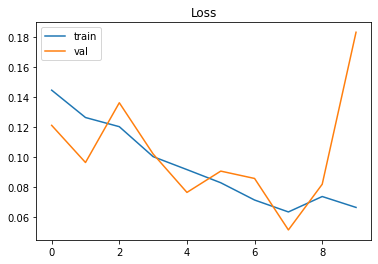

In [30]:
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.title("Loss")
plt.legend(labels=["train", "val"])
plt.show()

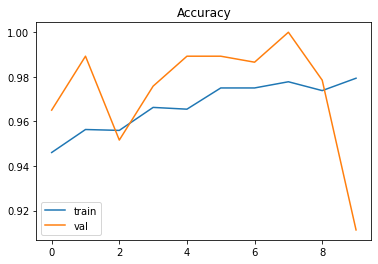

In [31]:
plt.plot(results.history["categorical_accuracy"])
plt.plot(results.history["val_categorical_accuracy"])
plt.title("Accuracy")
plt.legend(labels=["train", "val"])
plt.show()

 2. Now use transfer learning by incorporating the pretrained VGG16 model.

In [32]:
from tensorflow.keras.applications import VGG16

In [34]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(300,300,3))

In [35]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

Build a Sequential model, using our VGG16 base. Make sure the freeze the weights of the convolutional backbone, but leave the remainder of the network weights as learnable. Fit this model and compare the overall accuracy as well as the loss curves (efficiency).


In [40]:
model = tf.keras.models.Sequential()

model.add(conv_base)
model.layers[0].trainable = False
model.add(tfkl.Flatten())
model.add(tfkl.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 9, 9, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 124419    
Total params: 14,839,107
Trainable params: 124,419
Non-trainable params: 14,714,688
_________________________________________________________________


In [46]:
model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
    metrics=[tfk.metrics.CategoricalAccuracy()]
)

results = model.fit(train_data, steps_per_epoch=16, epochs=10, validation_data=test_data, validation_steps = 8)

Epoch 1/10
16/16 [==============================] - 655s 41s/step - loss: 2.3727 - categorical_accuracy: 0.4609 - val_loss: 3.1146 - val_categorical_accuracy: 0.3438
Epoch 2/10
16/16 [==============================] - 651s 41s/step - loss: 1.8744 - categorical_accuracy: 0.4746 - val_loss: 2.1660 - val_categorical_accuracy: 0.4297
Epoch 3/10
16/16 [==============================] - 653s 41s/step - loss: 1.0296 - categorical_accuracy: 0.6094 - val_loss: 1.4183 - val_categorical_accuracy: 0.4570
Epoch 4/10
16/16 [==============================] - 653s 41s/step - loss: 1.8955 - categorical_accuracy: 0.4551 - val_loss: 2.2408 - val_categorical_accuracy: 0.4492
Epoch 5/10
15/16 [===========================>..] - ETA: 25s - loss: 1.4888 - categorical_accuracy: 0.5169WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 160 batches). You may need to use the repeat() 

15/16 [===========================>..] - 617s 41s/step - loss: 1.4888 - categorical_accuracy: 0.5169 - val_loss: 1.2427 - val_categorical_accuracy: 0.5977


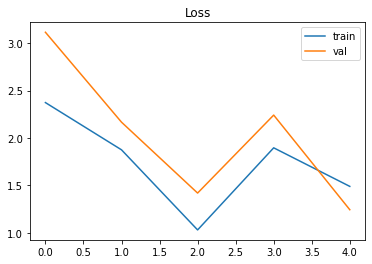

In [47]:
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "val"])
plt.title("Loss")
plt.show()

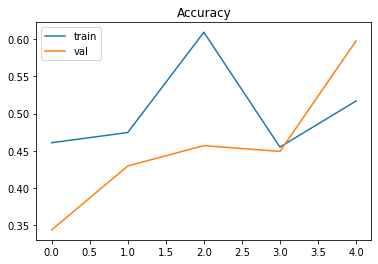

In [48]:
plt.plot(results.history["categorical_accuracy"])
plt.plot(results.history["val_categorical_accuracy"])
plt.legend(labels=["train", "val"])
plt.title("Accuracy")
plt.show()